In [5]:
import matplotlib.pyplot as plt
import pickle
import yaml
% matplotlib inline

In [6]:
# Point this towards the output specified for attack_known_networks.py
PICKLEJAR="picklejar/"

In [7]:
def plot_network_comparisons(network_file):
    """
    Given a YAML config file written using the attack_comparison.compare_to_random_networks function,
    Read in the data from the pickle files of the networks in the file and plot the results of the attacks
    """
    
    nets = open(network_file, 'r')
    
    for network in yaml.load_all(nets):
        pfile = PICKLEJAR + network["name"]+".pickle"
    
        fi = open(pfile, 'r')
       
        fractions = pickle.load(fi)
       
        net_results = pickle.load(fi)
       
        er_results = pickle.load(fi)
       
        cfg_results = pickle.load(fi)
       
        f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,30))
        
        attack_types = ["Random Attack", "Targeted Attack", "Random-Neighbor Attack", "Targeted-Neighbor Attack"]
        colors = ["r", "g", "b", "y"]
        markers= ['o', 'v', 'x', 's']
        
        f.suptitle("Network Comparisons: "+network["name"], fontsize=24)
              
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
    
        ax1.set_title("Original Network", fontsize=20)
        ax1.set_xlabel("Fraction of Nodes Removed")
        ax1.set_ylabel("|S1|/N")
        
        for i, r in enumerate(net_results):
            ax1.scatter(fractions, r, c=colors[i], marker=markers[i])
            
        ax1.legend(attack_types)
       
       
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
       
        ax2.set_title("Erdos-Renyi Network", fontsize=20)
        ax2.set_xlabel("Fraction of Nodes Removed")
        ax2.set_ylabel("|S1|/N")
       
        for i, r in enumerate(er_results):
            ax2.scatter(fractions, r, c=colors[i], marker=markers[i])
       
        ax2.legend(attack_types)
       
       
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)    
       
        ax3.set_title("Configuration Model", fontsize=20)
        ax3.set_xlabel("Fraction of Nodes Removed")
        ax3.set_ylabel("|S1|/N")
       
        for i, r in enumerate(cfg_results):
            ax3.scatter(fractions, r, c=colors[i], marker=markers[i])
       
        ax3.legend(attack_types)

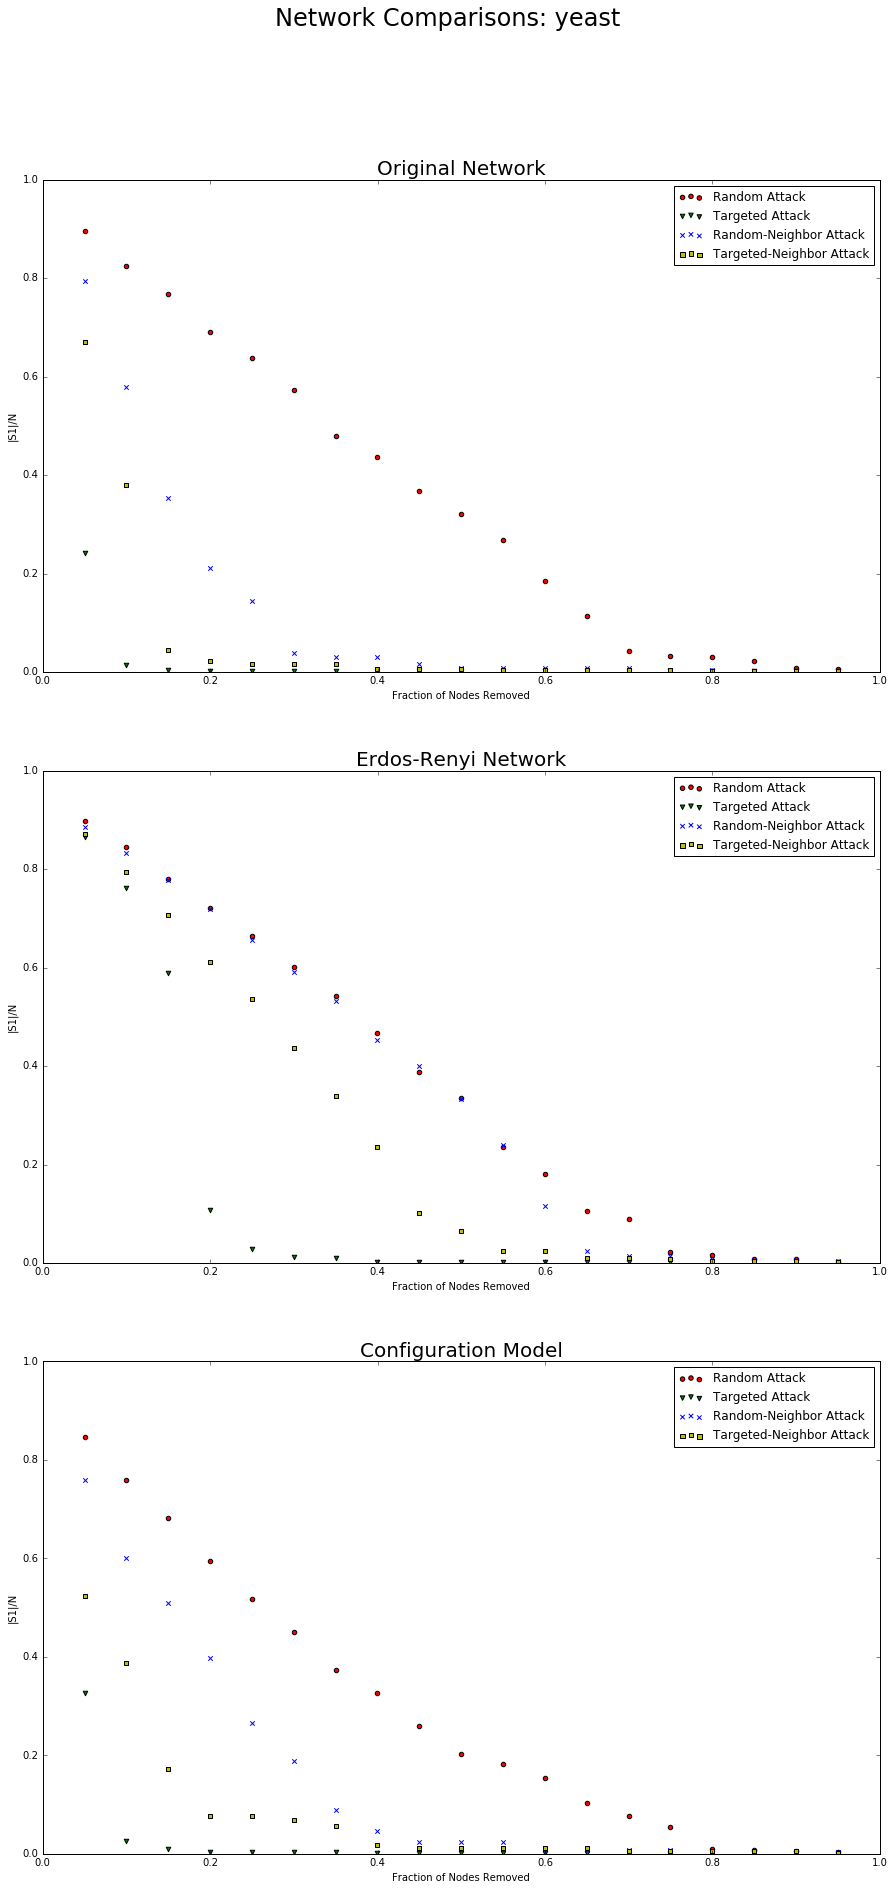

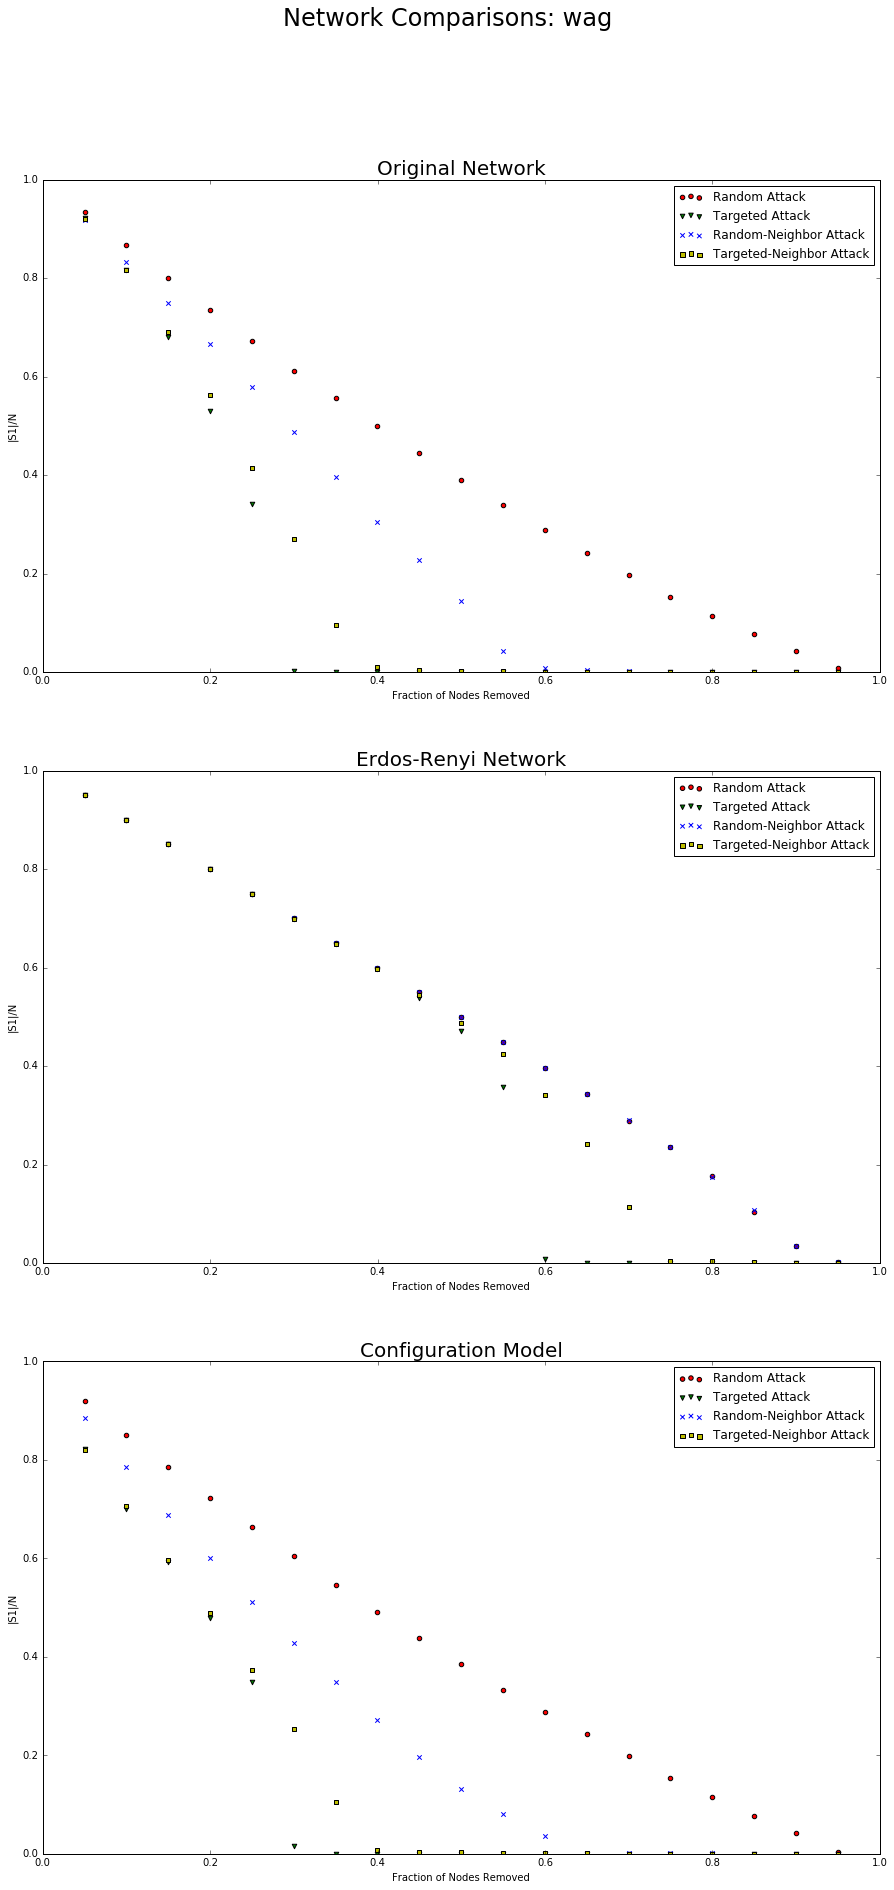

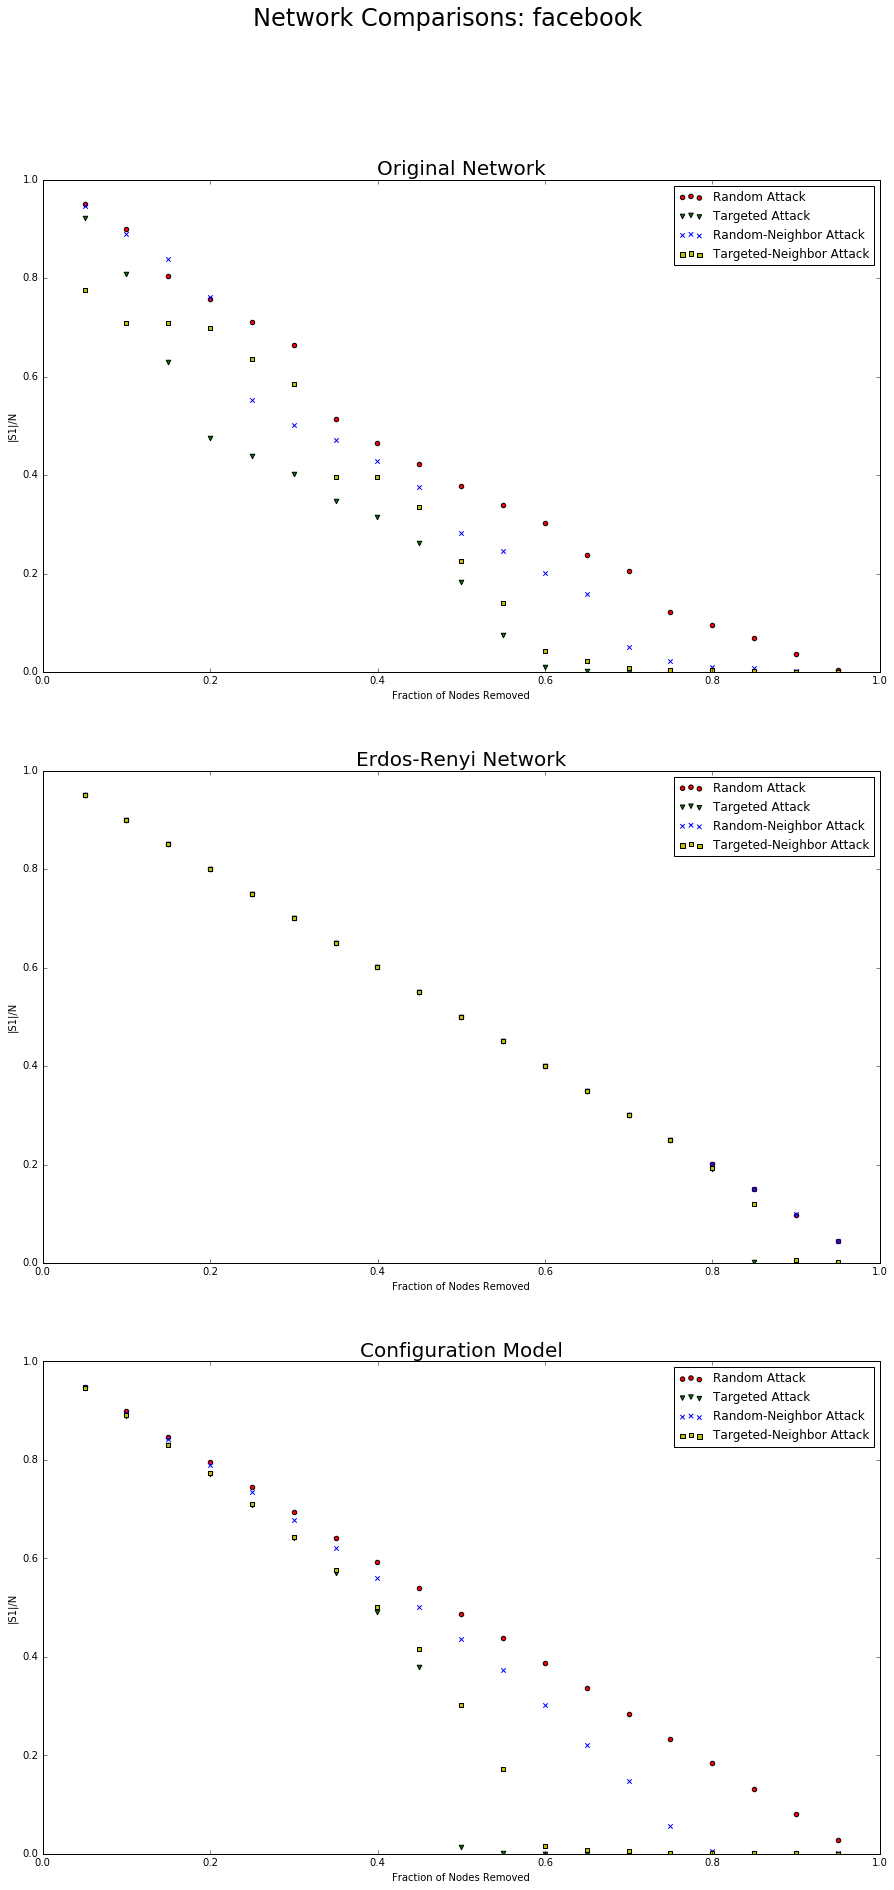

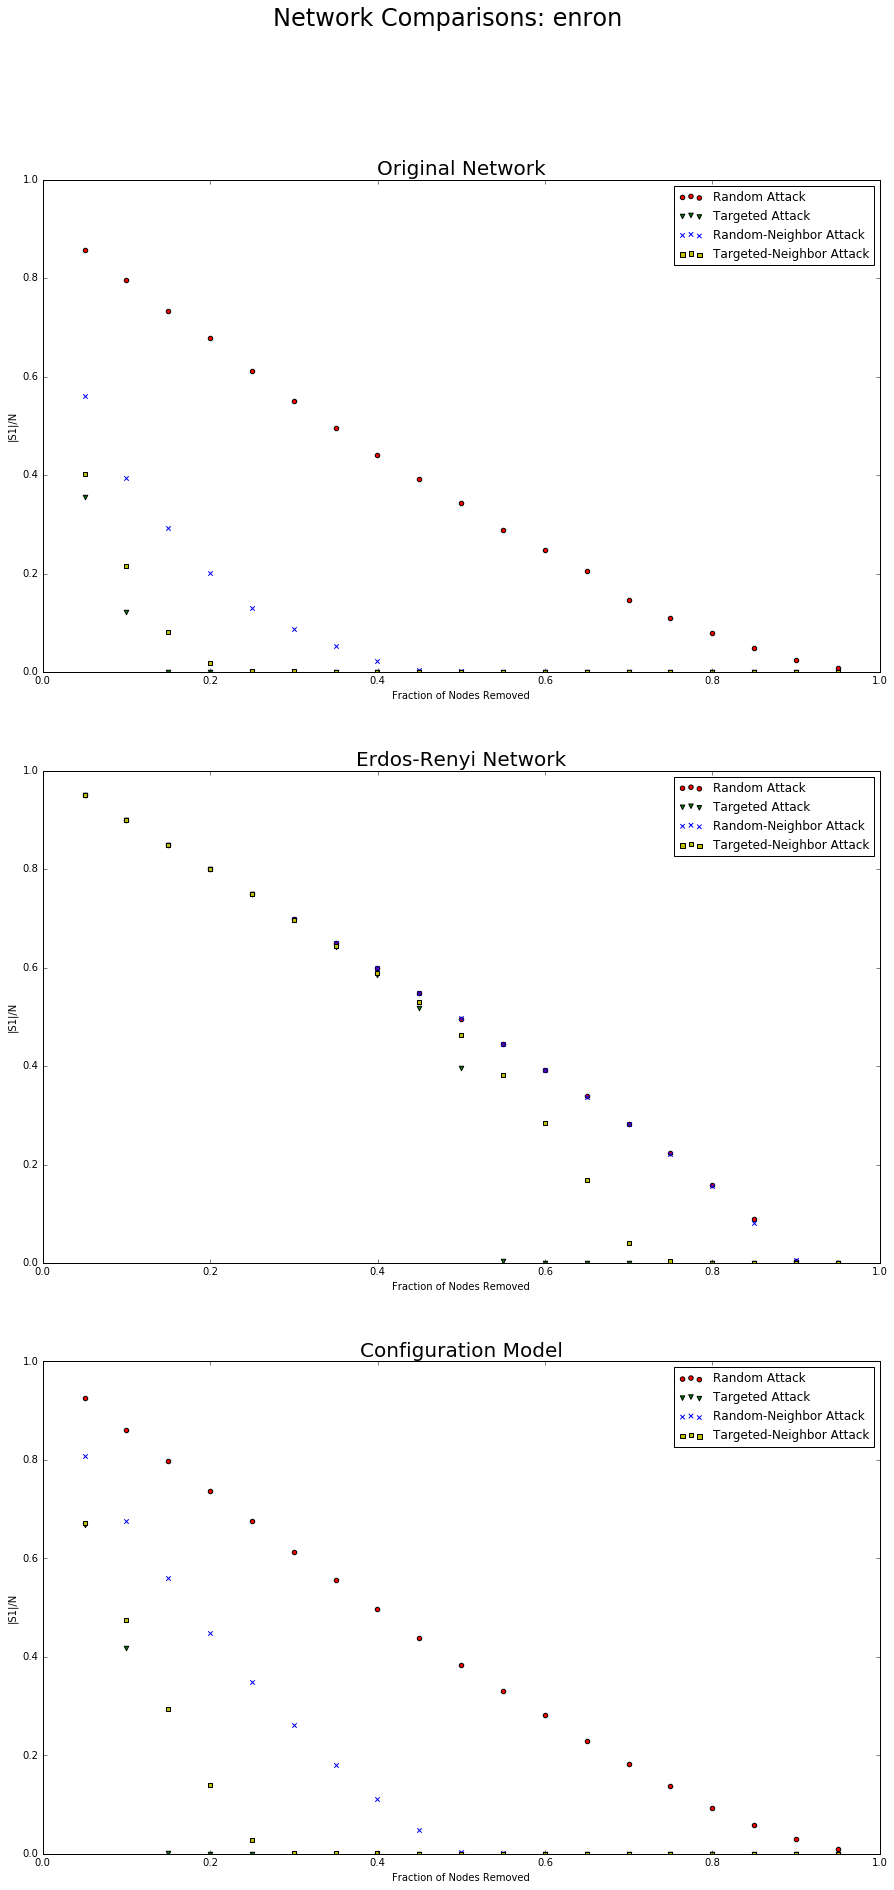

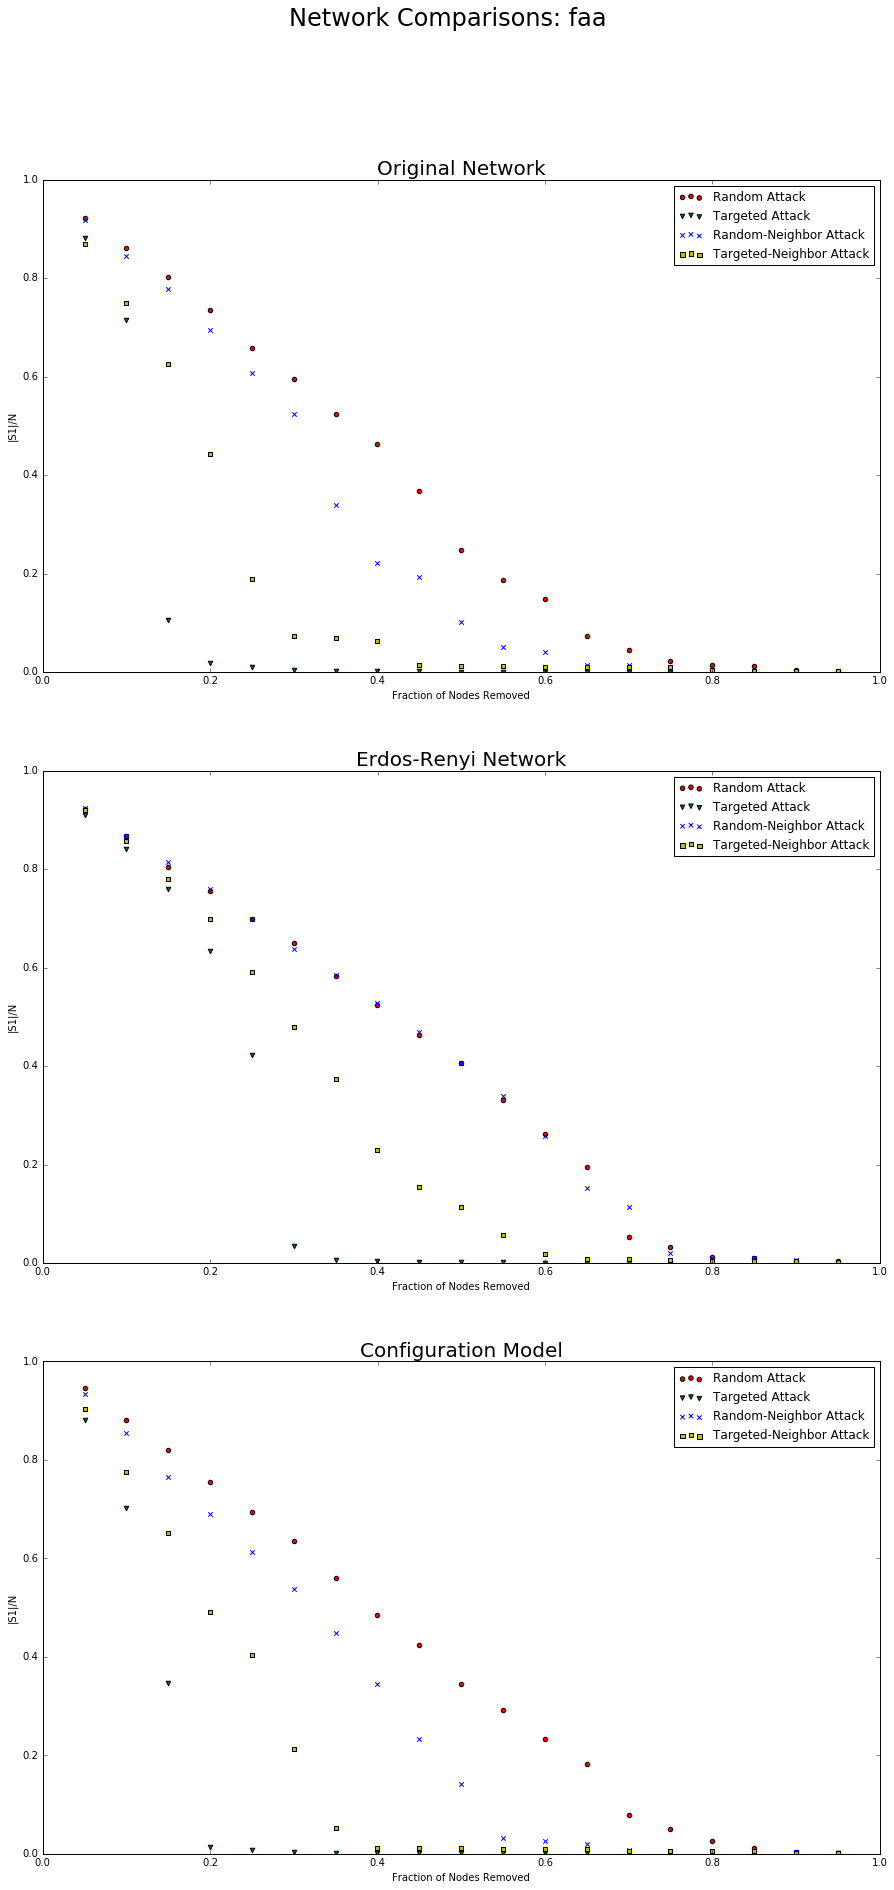

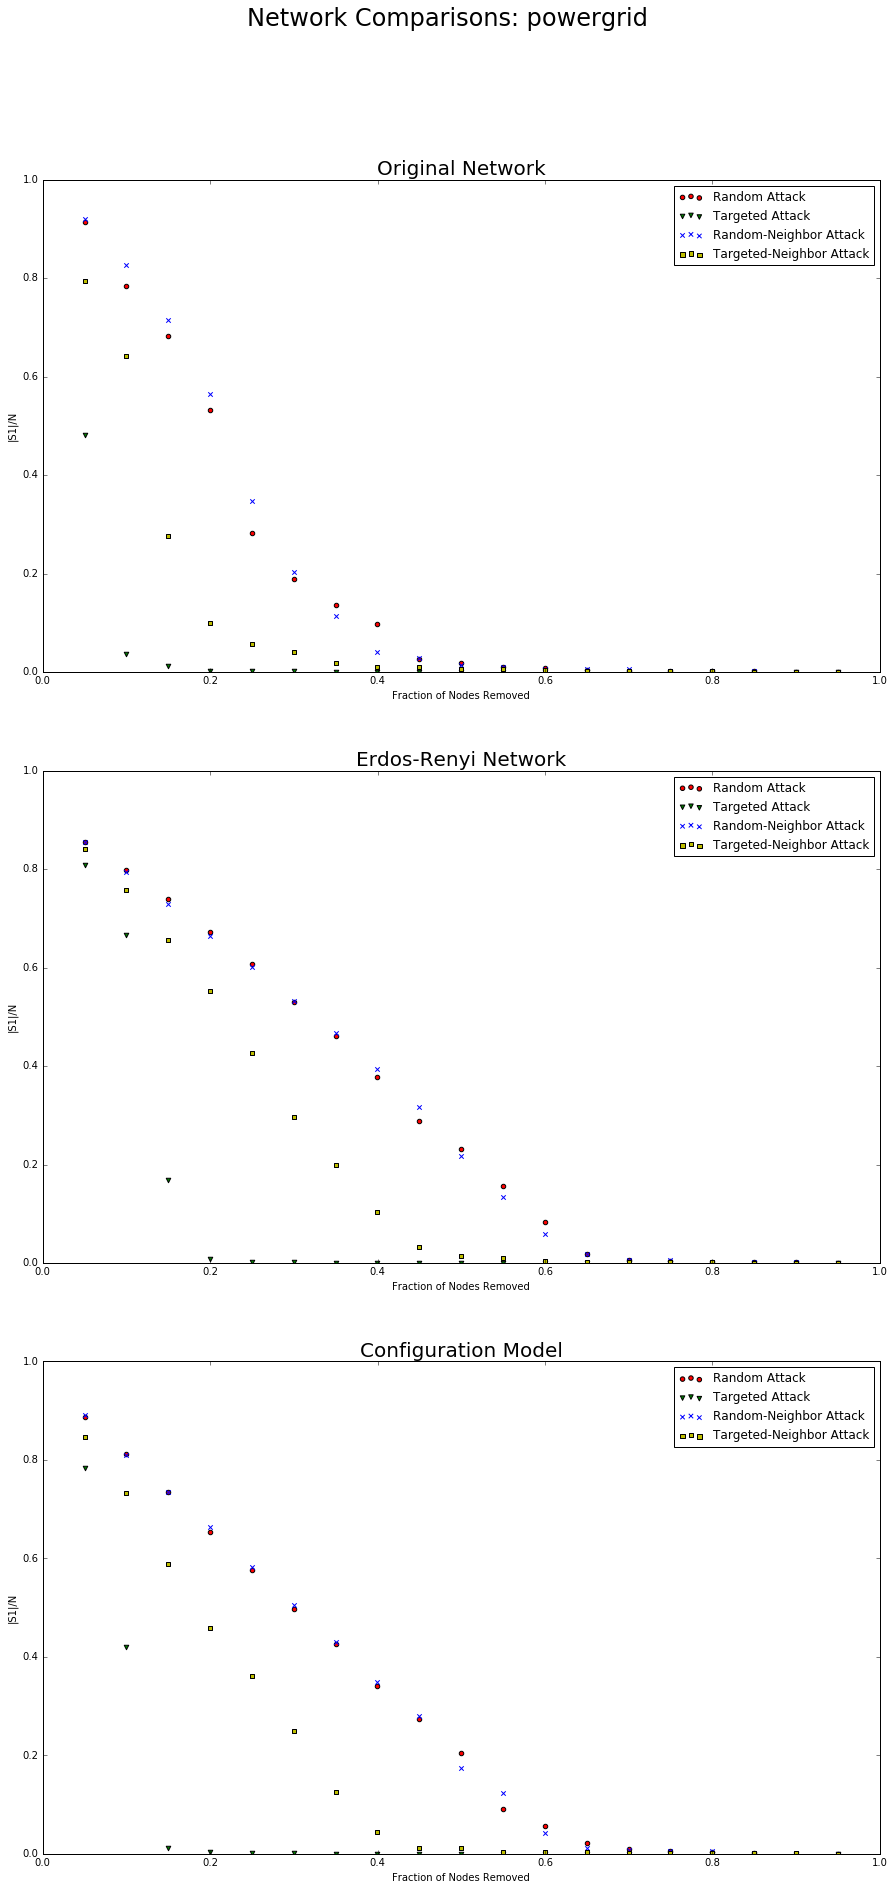

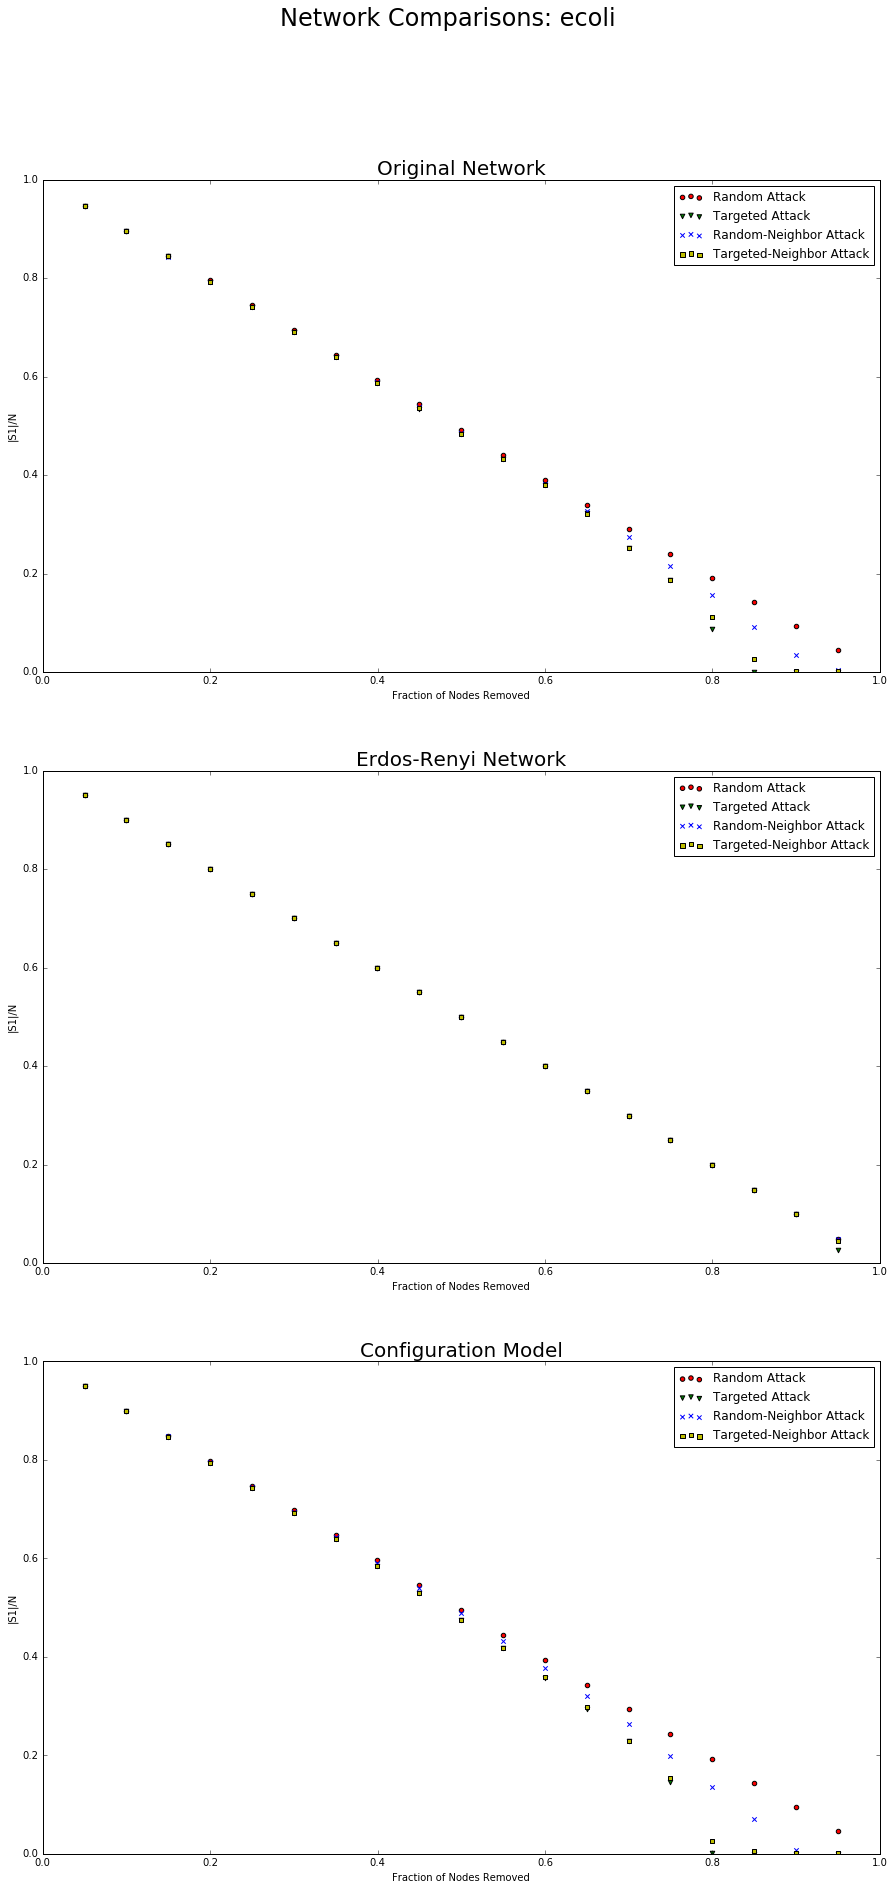

In [8]:
plot_network_comparisons("networks.yaml")